In [1]:
from dataset_factory.custom_dataset import FaceDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from dataset_factory.transform import Transform
import numpy as np
from utils import *
import yaml

In [2]:
config = yaml.safe_load(open('config.yaml'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 128, 128])
torch.Size([1, 128, 128])


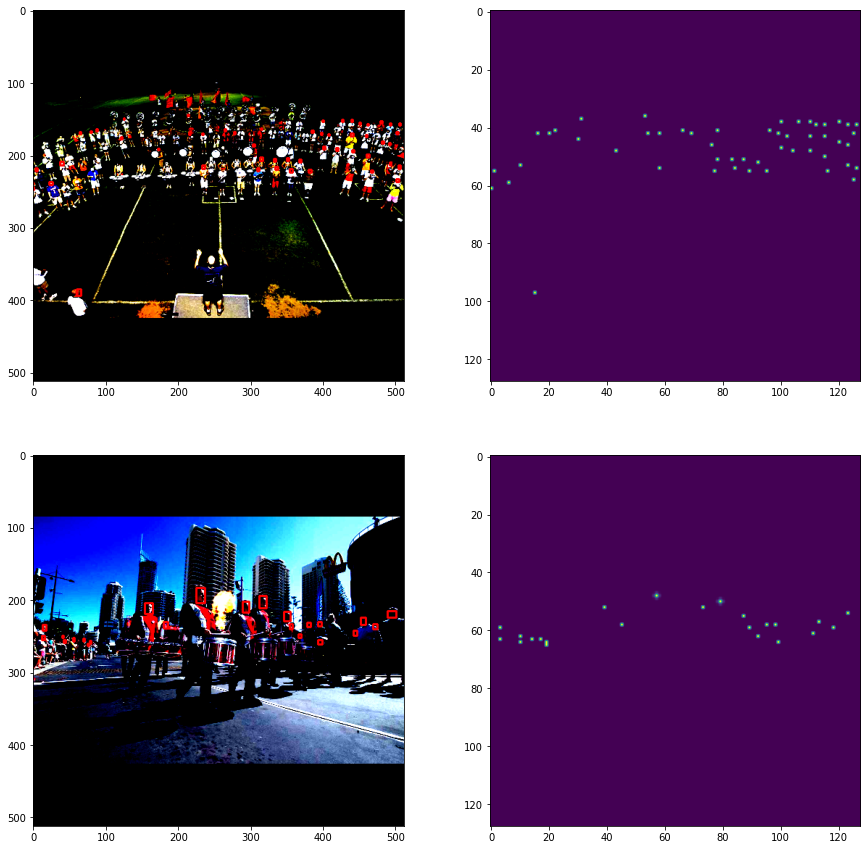

In [3]:
train_ds = FaceDataset(config, 'dataset/wider_face/WIDER_val', Transform(), mode = 'valid')
train_loader = DataLoader(train_ds, batch_size=2, collate_fn=train_ds.collate_fn)
col = 2
row = 2
cnt = 1
fig = plt.figure(figsize=(15, 15))
for data in train_loader:
    batch_imgs, batch_boxes, batch_classes, batch_hms, infos = data
    for img, bboxes, hm, classes, info in zip(batch_imgs, batch_boxes, batch_hms, batch_classes, infos):
        print(hm.shape)
        #print(info)
        new_img = img.permute(1, 2, 0)
        new_img = np.array(new_img, np.float32)
        new_img = applyBboxes(new_img, bboxes)
        fig.add_subplot(row, col, cnt)
        cnt += 1
        plt.imshow(new_img)
        new_hm = hm.permute(1, 2, 0)
        fig.add_subplot(row, col, cnt)
        cnt += 1
        plt.imshow(new_hm[:, :, 0])
    plt.show()
    break